In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline


In [2]:
base_data = pd.read_csv('dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
base_data.shape

(7043, 21)

In [6]:
base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### - **insight 1**: 75% customers have tenure more than 55 months
### - **Tenure**: Customers who are less likely to churn. Tenure is the number of months that a customer has been with them
### - **insight 2**: Average monthly charges are 64.76 USD but also there are 25% customers who pay 89.85 USD

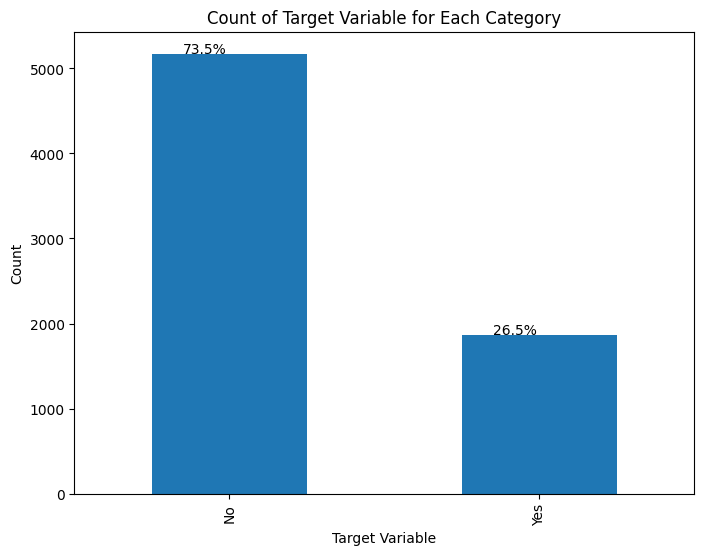

In [41]:
value_counts = base_data['Churn'].value_counts()

# Create the bar plot
ax = value_counts.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.title('Count of Target Variable for Each Category')

# Add percentage labels above the bars
total_count = len(base_data['Churn'])
for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height() / total_count)
    x = i.get_x() + i.get_width() / 2 - 0.15
    y = i.get_height() + 1
    ax.annotate(percentage, (x, y))

plt.show()


In [39]:
100*(base_data['Churn'].value_counts())/len(base_data['Churn'])


No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

### - **insight 1** : Data is imbalanced as the distribution is 73:27
#### - we can do upsampling or downsampling to rectify the same



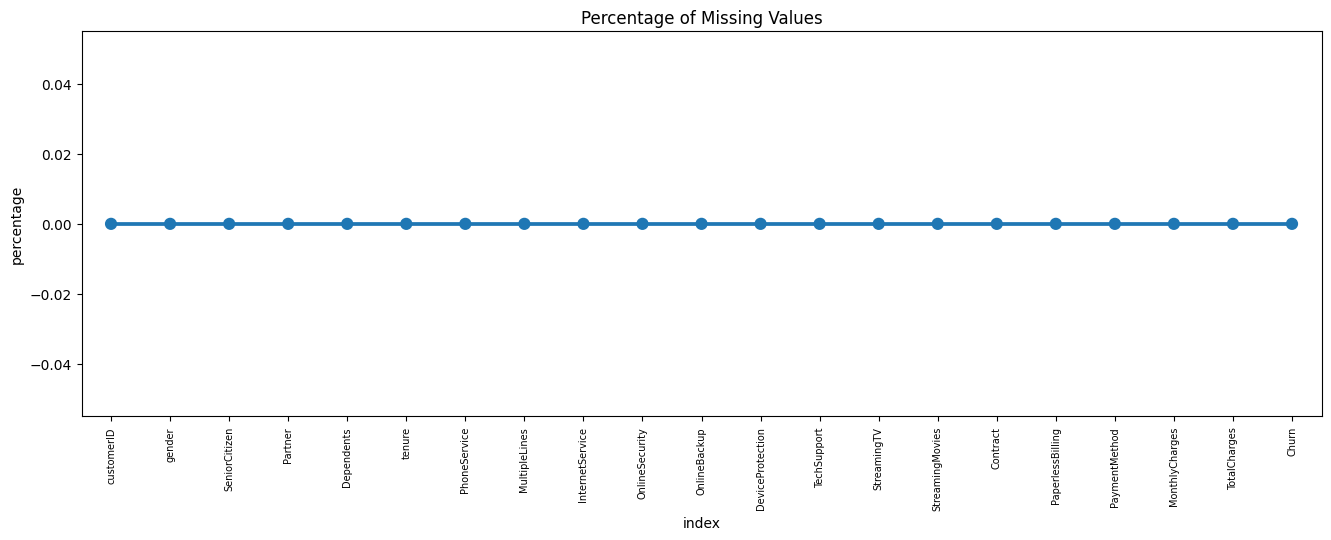

In [46]:
missing = pd.DataFrame((base_data.isnull().sum())*100/base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation = 90,fontsize =7)
plt.title('Percentage of Missing Values')
plt.ylabel('percentage')
plt.show()

Missing Data - Initial Intuition
Here, we don't have any missing data.

General Thumb Rules:

- For features with less missing values- can use regression (time series forecasting model) to predict the missing values or fill with the mean of the values present, depending on the feature.

- For features with very high number of missing values- it is better to drop those columns (if uncorrelated to any other feature) as they give very less insight on analysis.

- As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely

In [89]:
### converting Total Charges into numeric type as it is in object
base_data_copy = base_data.copy()
base_data_copy.TotalCharges = pd.to_numeric(base_data_copy.TotalCharges,errors='coerce')
base_data_copy.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### what we can see is that we have 11 null values in total charges after we converted into numeric type which was not available earlier as it was the type object before.

##### now as the % null values is too small lets just fill it with 0

In [92]:
# base_data_copy.loc[base_data_copy['TotalCharges'].isnull()==True]
base_data_copy.fillna(0,inplace=True)

In [93]:
base_data_copy.loc[base_data_copy['TotalCharges'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


Catergorizing continous feature (tenure) into bins

In [94]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

base_data_copy['tenure_group'] = pd.cut(base_data_copy.tenure, range(1, 80, 12), right=False, labels=labels)

base_data_copy['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

Removing columns not required

In [95]:
base_data_copy.drop(columns=['customerID','tenure'],inplace=True)
base_data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# Univariate Analysis

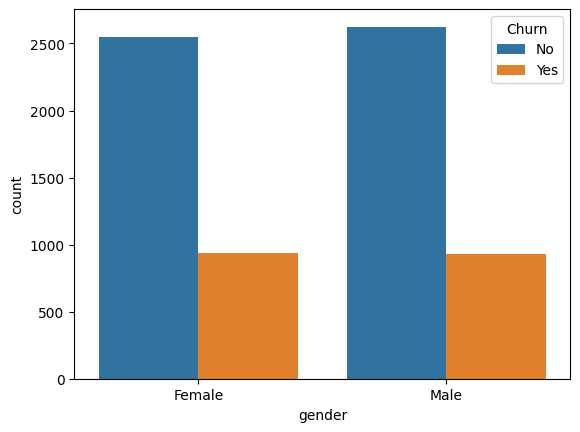

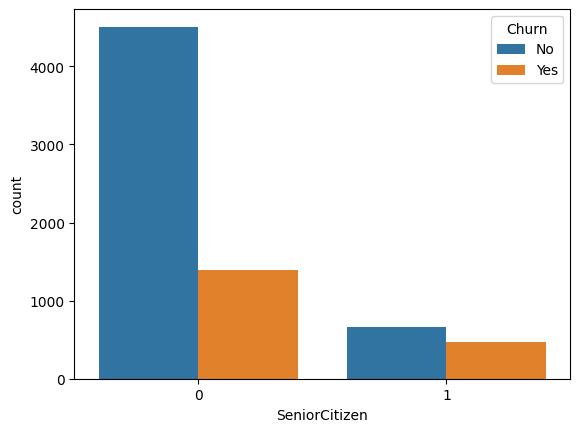

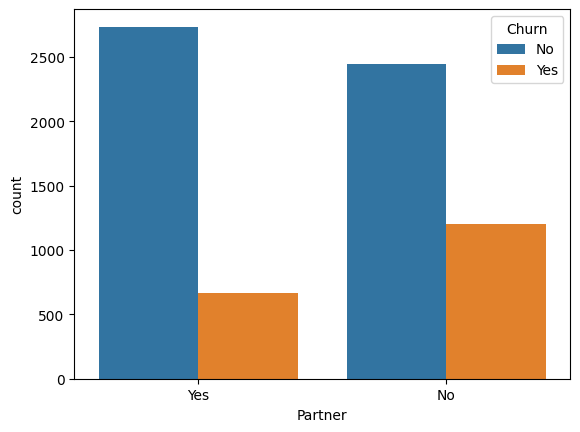

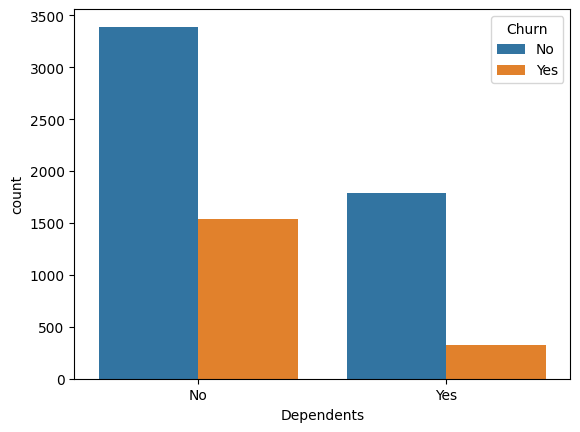

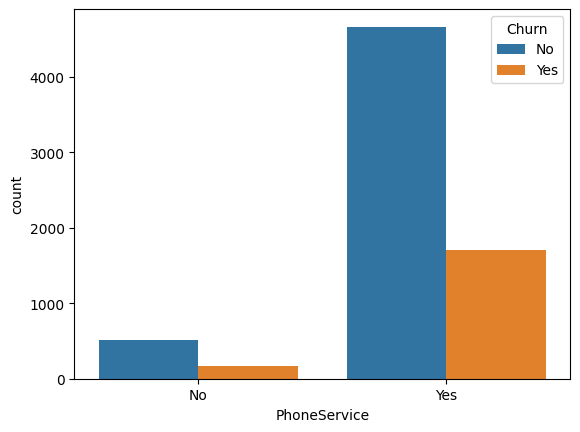

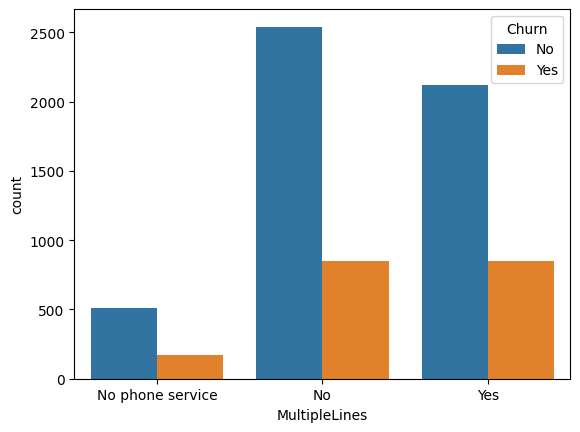

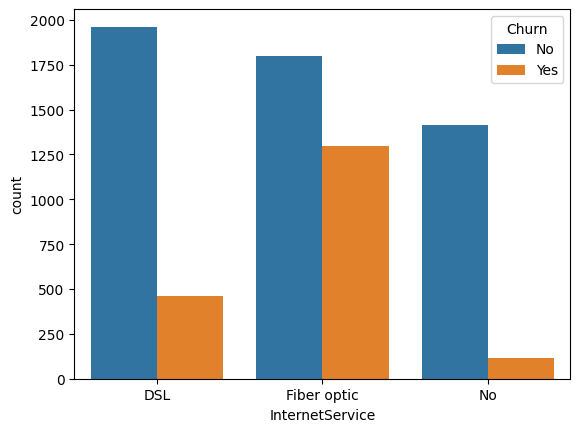

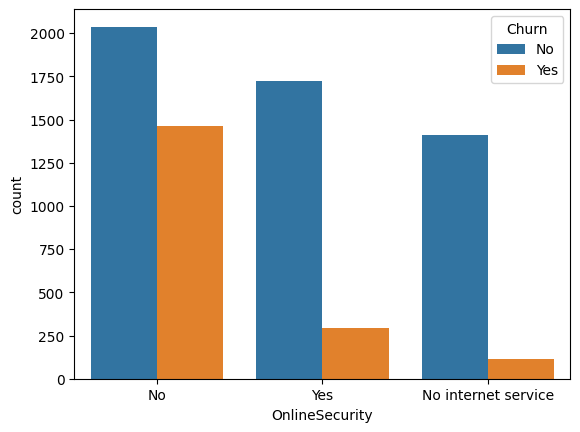

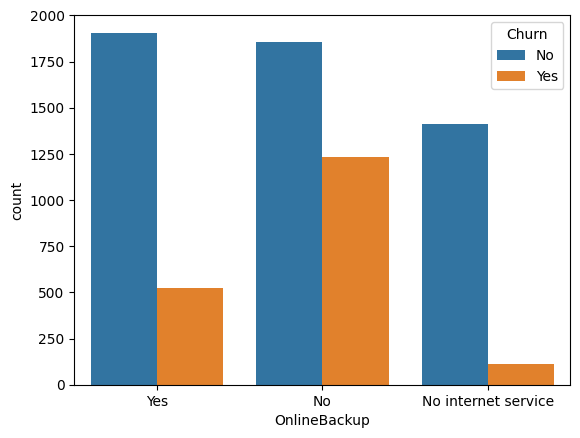

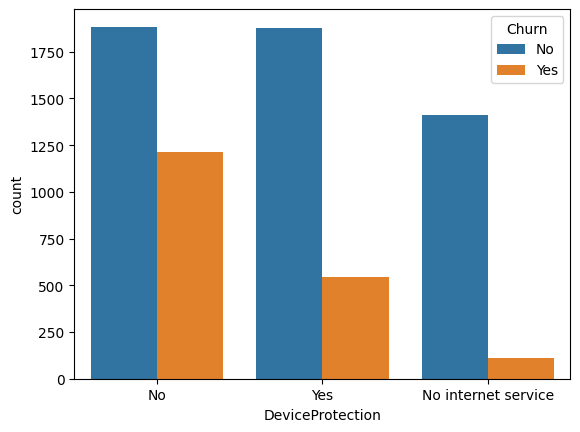

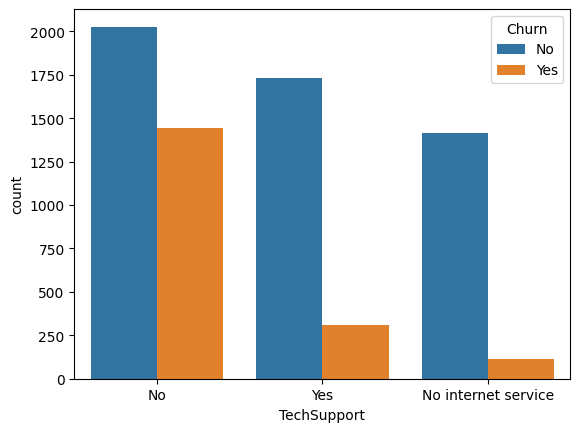

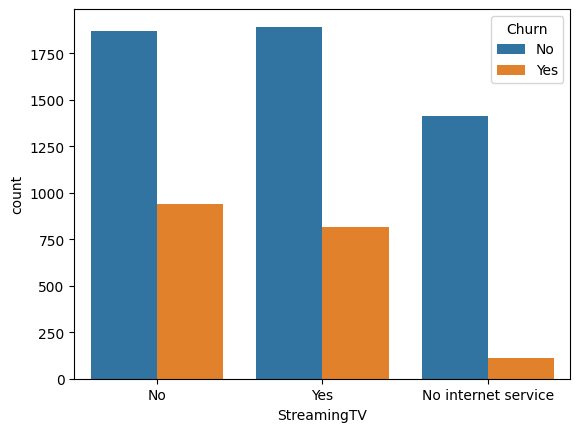

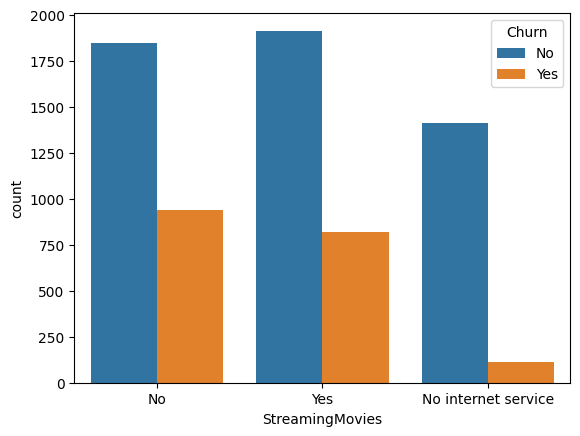

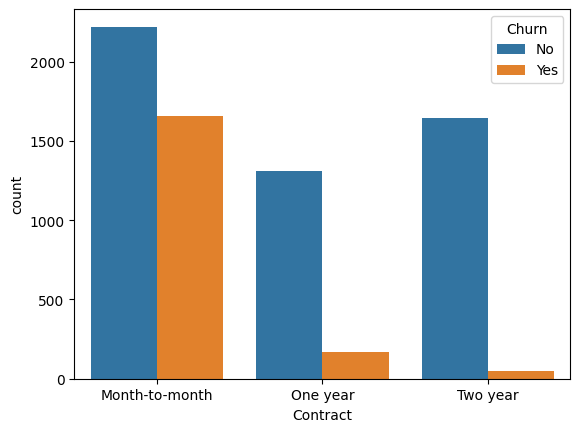

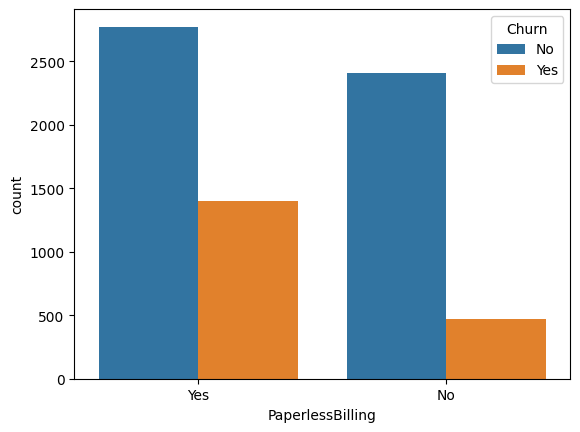

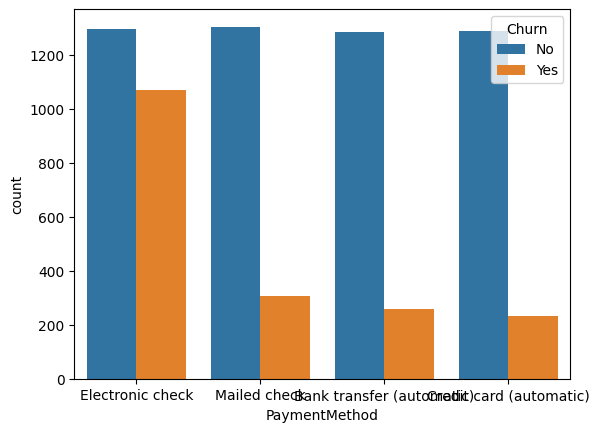

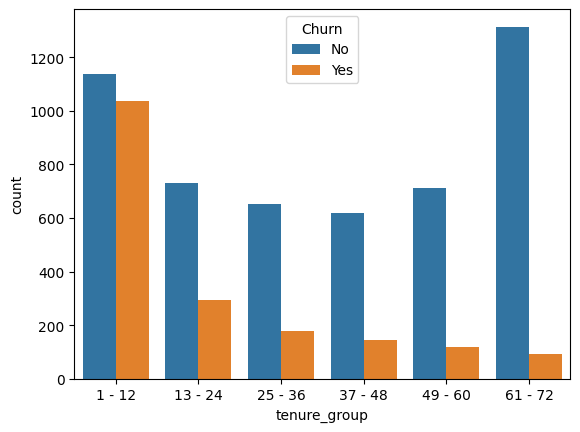

In [96]:
for i,predictors in enumerate(base_data_copy.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=base_data_copy,x=predictors,hue='Churn')

converting target feature (churn) to binary numeric, i.e. yes = 1, no = 0

In [97]:

base_data_copy['Churn'] = np.where(base_data_copy['Churn'] == 'Yes',1,0)

In [98]:
base_data_copy

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,13 - 24
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,61 - 72
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,1 - 12
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,1 - 12


converting categorical variables/features to dummy variables
- label encoding: giving arbitrary numbers to each item in that variable. can lead to model biasness towards the item with higher number, hence advised to use only with target variable or when you need to rank.
- one hot encoding: converting n valid values of a feature to n columns with 0 and 1 values.

In [99]:
base_data_dummies = pd.get_dummies(base_data_copy)
base_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


Relationship between monthly charge and total charges

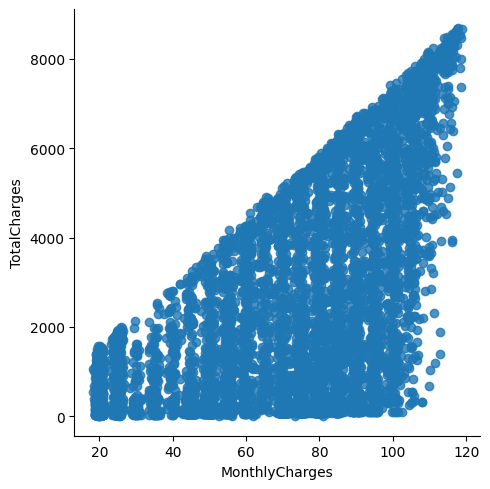

In [100]:
sns.lmplot(data=base_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)
## As expected: Total cgarges increases with increase in monthly charges

Churn by monthly charges and total charges

Text(0.5, 1.0, 'Monthly charges by churn')

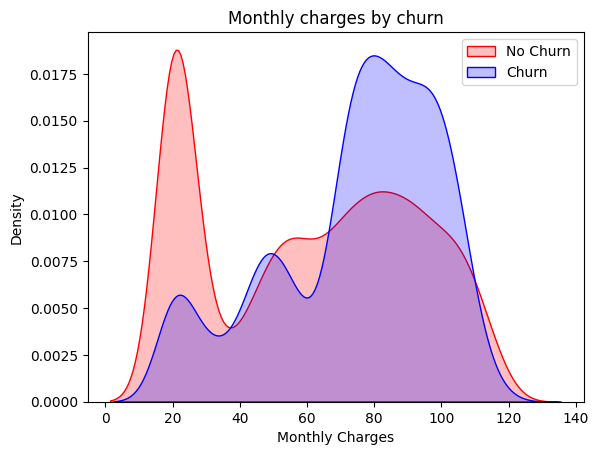

In [101]:
Mth = sns.kdeplot(base_data_dummies.MonthlyCharges[(base_data_dummies["Churn"] == 0) ],
                color="Red", fill = True)
Mth = sns.kdeplot(base_data_dummies.MonthlyCharges[(base_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Text(0.5, 1.0, 'Total charges by churn')

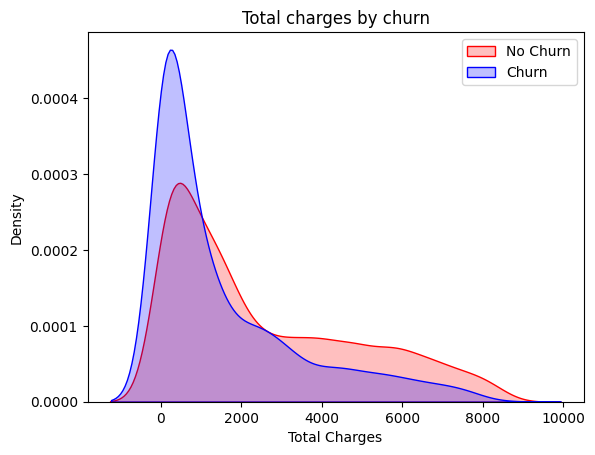

In [102]:
Tot = sns.kdeplot(base_data_dummies.TotalCharges[(base_data_dummies["Churn"] == 0) ],
                color="Red", fill = True)
Tot = sns.kdeplot(base_data_dummies.TotalCharges[(base_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", fill= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

Surprising insight as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

-------------------------------------------------------------

visualizing correlation of churn with all other predictors

<AxesSubplot: >

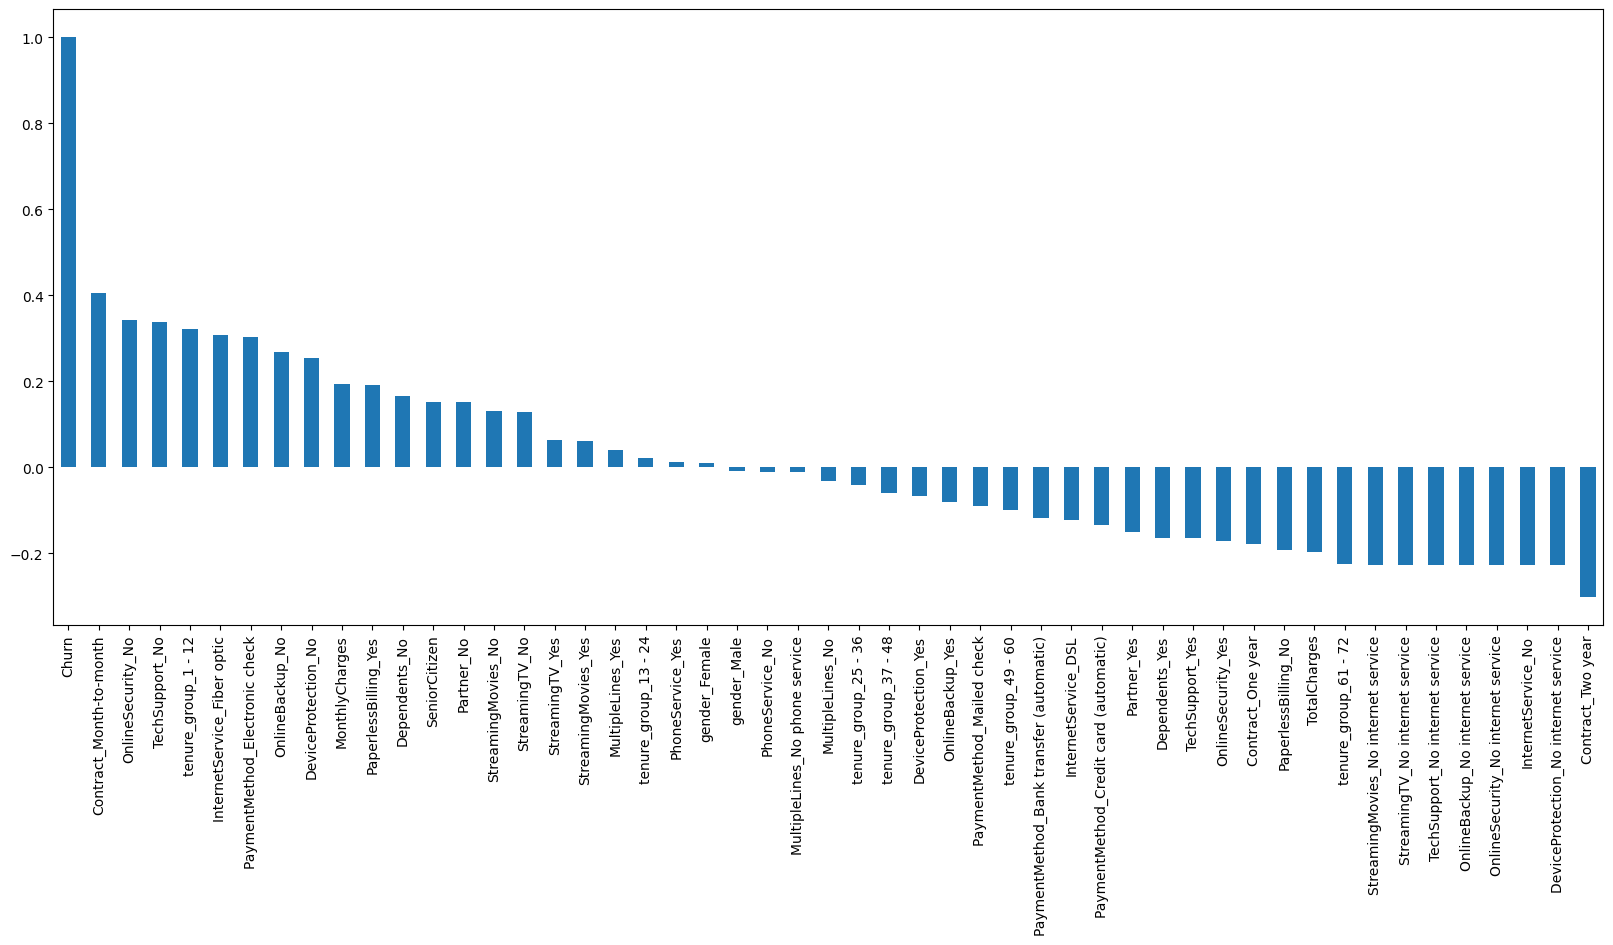

In [103]:
plt.figure(figsize=(20,8))
base_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight**:

**HIGH** Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

**LOW** Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

This is also evident from the Heatmap below

<AxesSubplot: >

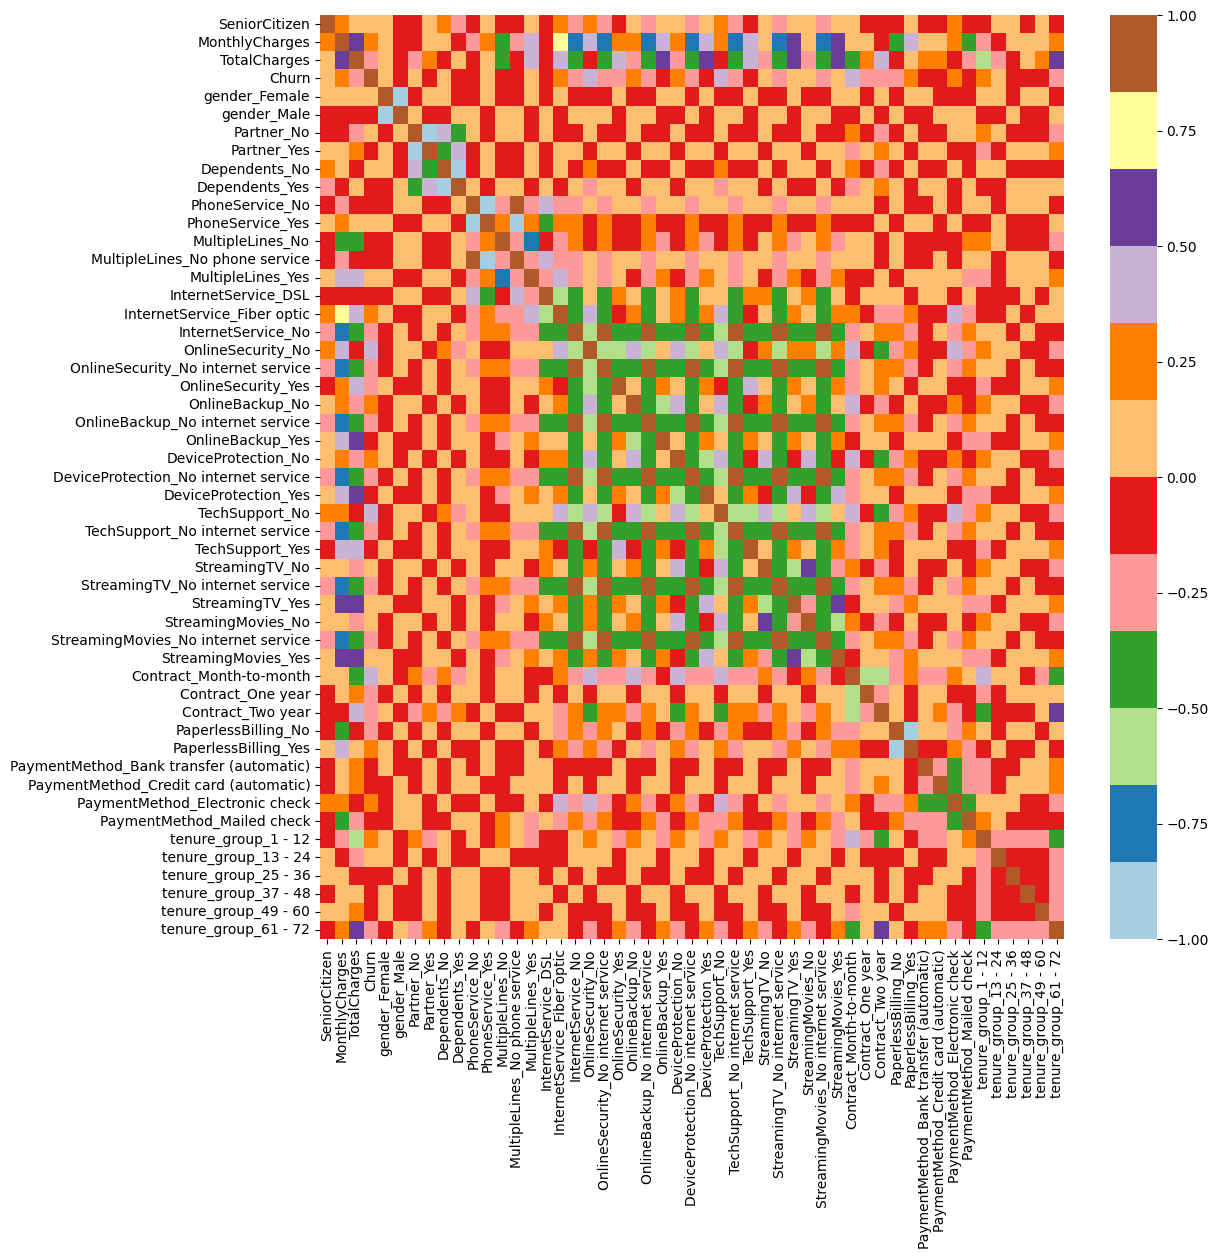

In [104]:
plt.figure(figsize=(12,12))
sns.heatmap(base_data_dummies.corr(), cmap="Paired")

# Bivariate Analysis

In [107]:
df_target0=base_data_copy.loc[base_data_copy["Churn"]==0]
df_target1=base_data_copy.loc[base_data_copy["Churn"]==1]

In [108]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

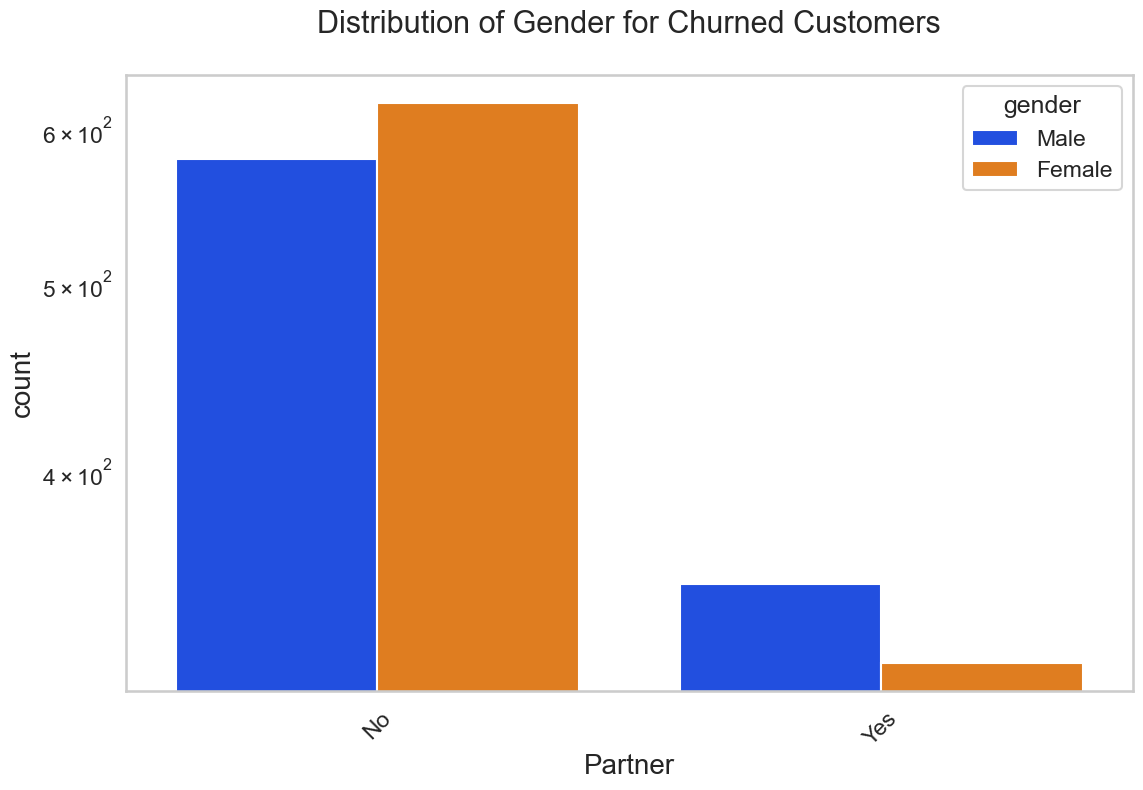

In [109]:
uniplot(df_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

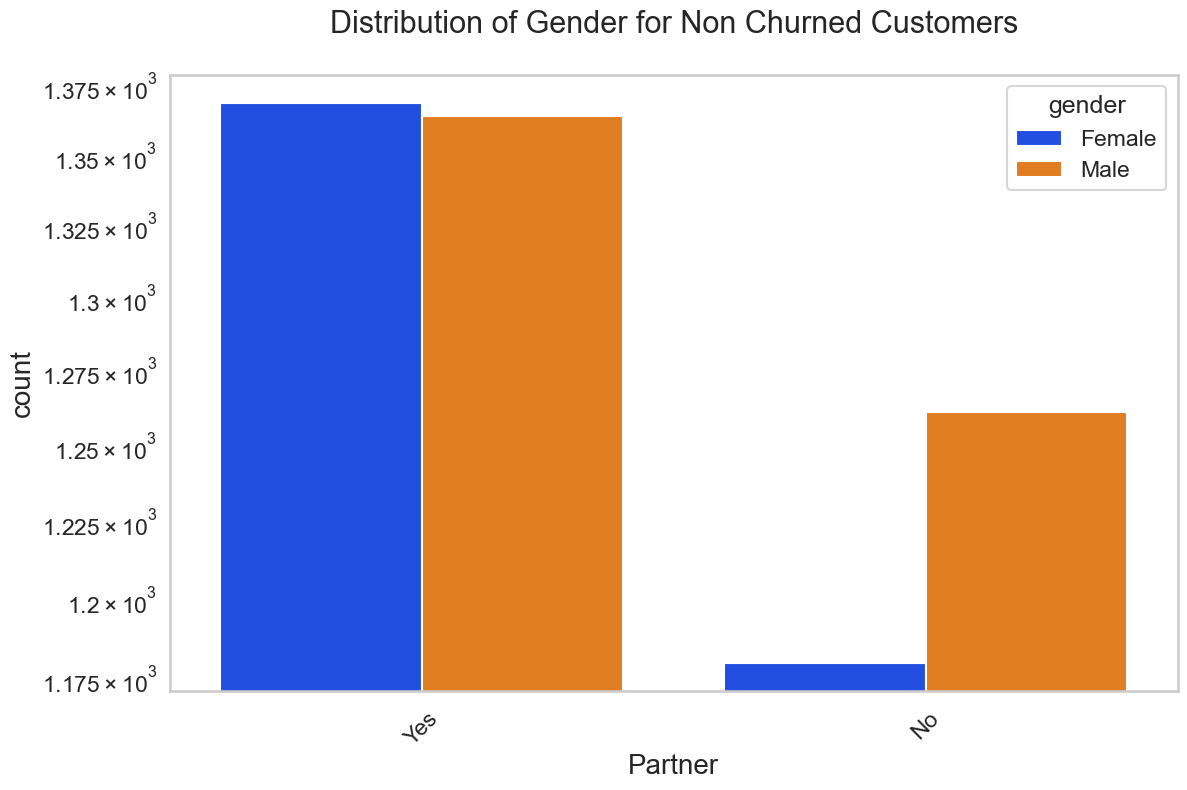

In [110]:
uniplot(df_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

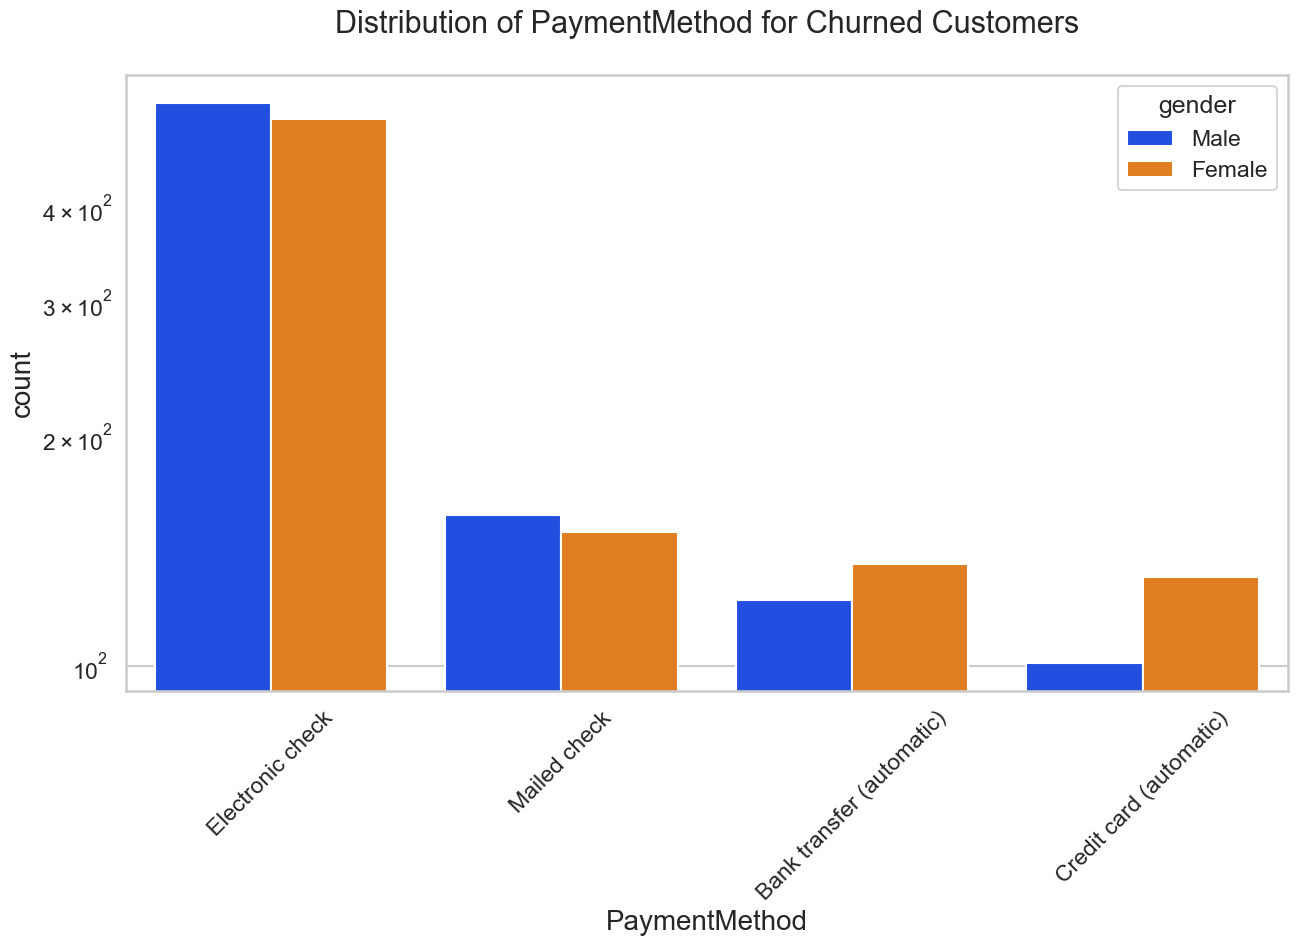

In [111]:
uniplot(df_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

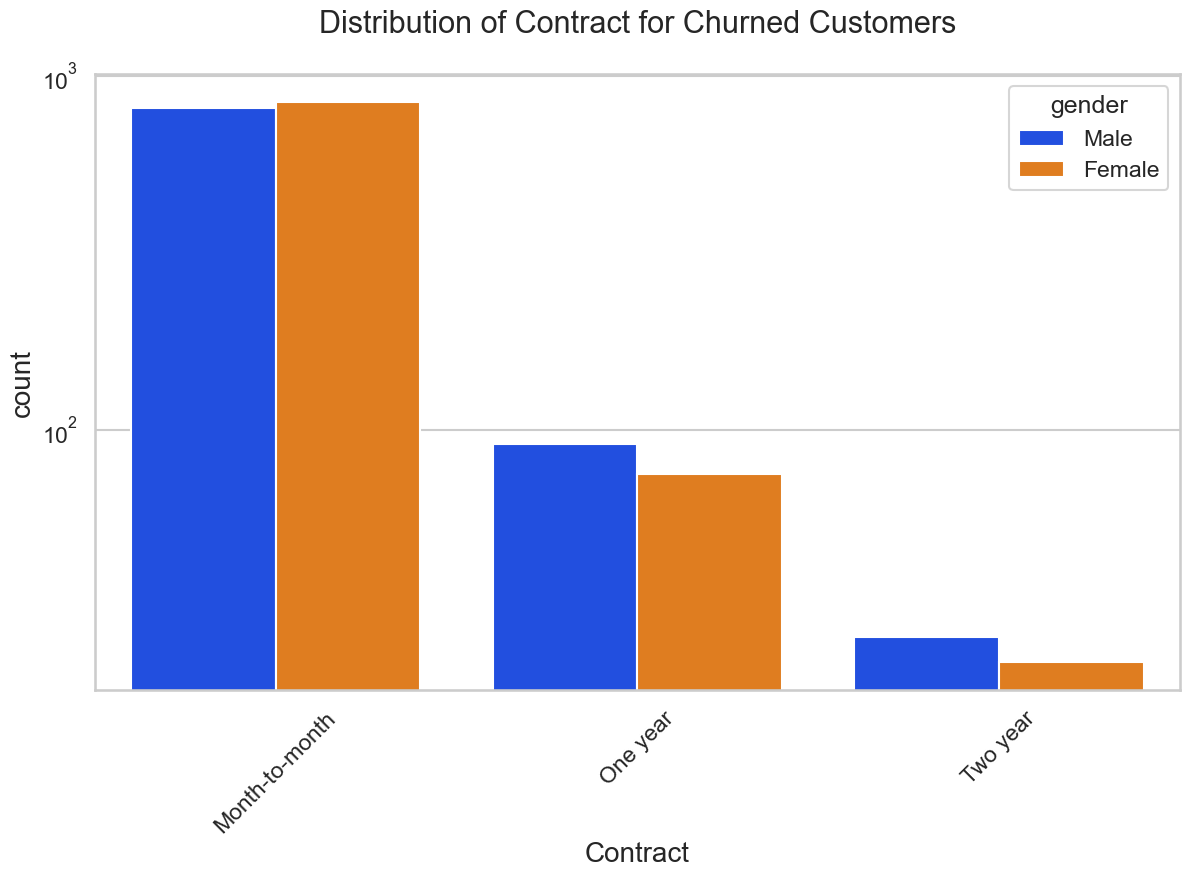

In [112]:
uniplot(df_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

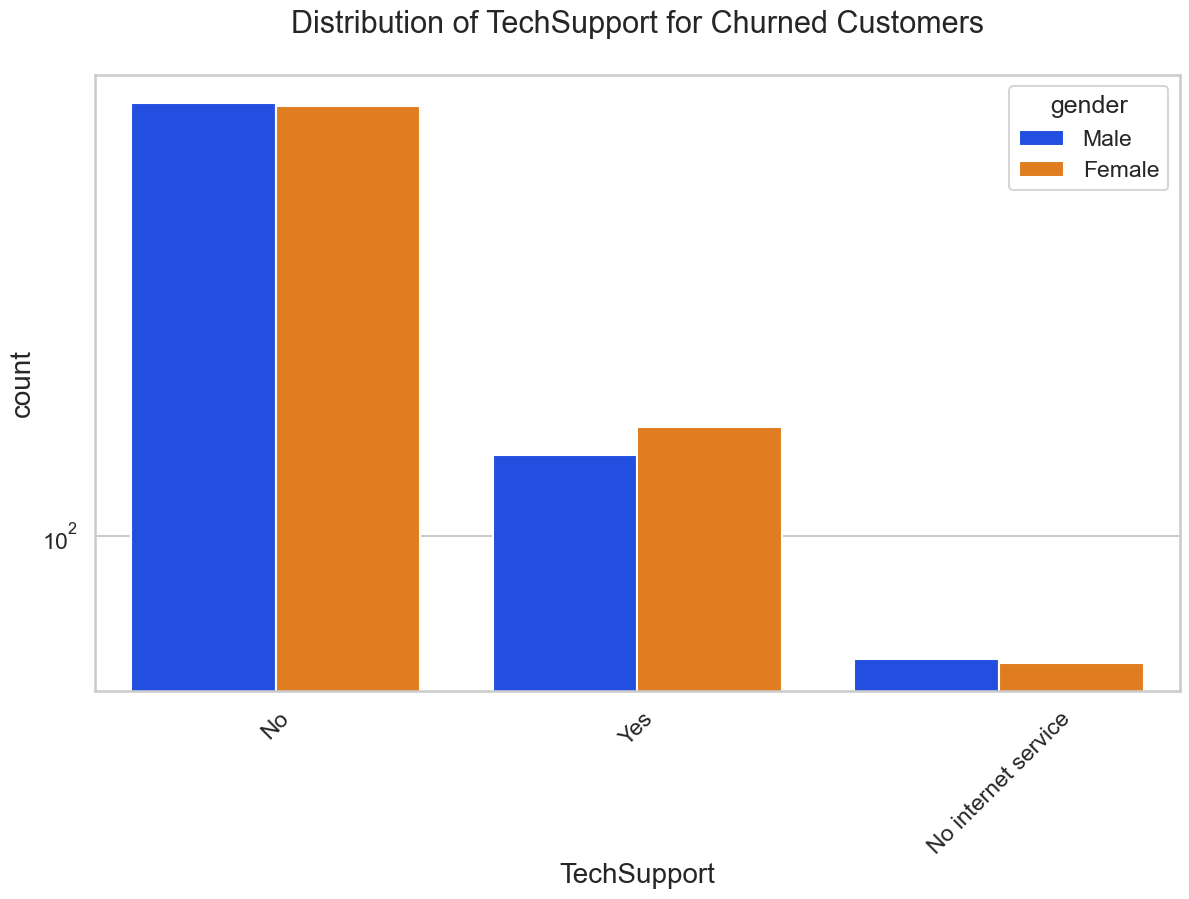

In [113]:
uniplot(df_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

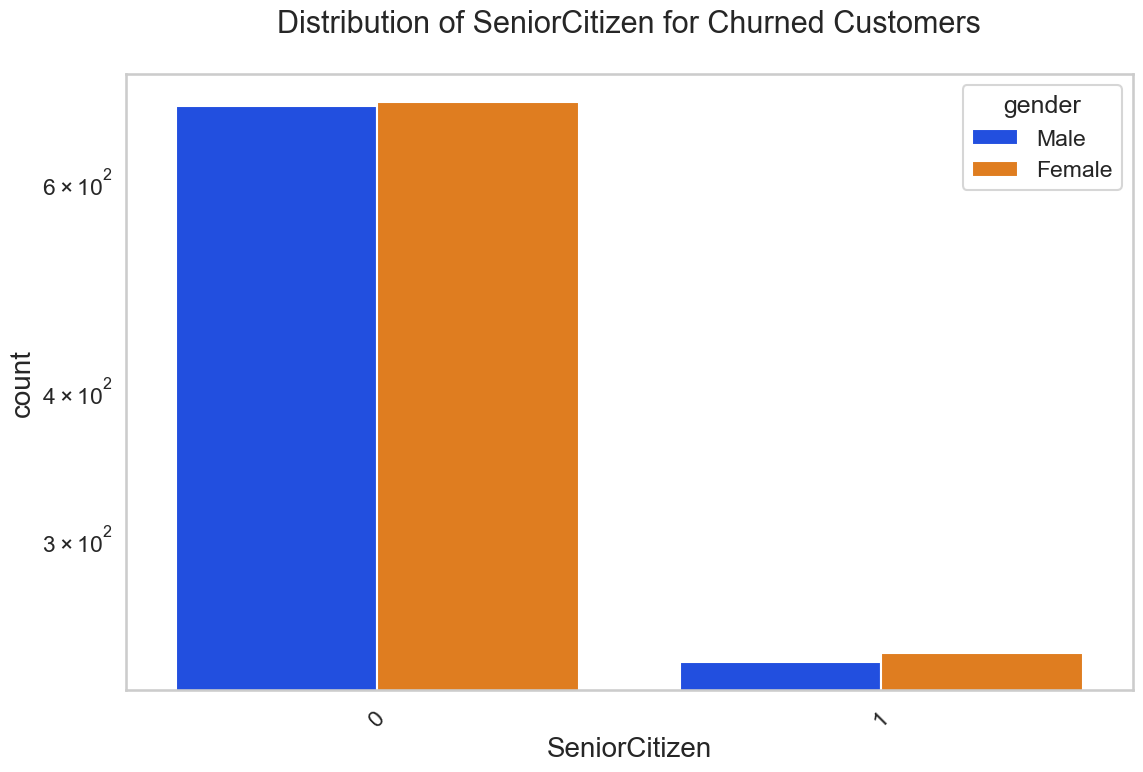

In [114]:
uniplot(df_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

Some basic Insights:

- Electronic check medium are the highest churners
- Contract Type: Monthly customers are more likely to churn because no           contract terms, as they are free to go customers.

- No Online security, No Tech Support category are high churners

- Non senior Citizens are high churners



In [116]:
base_data_dummies.to_csv('dataset/final_churn.csv')